Participants:
Name: Zhuoyun Chen ID:499214
Name: Xuewei Xiao ID:500641

In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score

Data Preprocessing

In [128]:
letters = pd.read_csv('letter-recognition.txt', header = None)

In [129]:
letters.columns = ['letter','x_box','y_box','width','high','onpix','x_bar','y_bar','x2bar','y2bar','xybar',
                   'x2ybr','xy2br','x_ege','xegvy','y_ege','yegvx']

In [130]:
#Pair 1: H and K
df_hk = letters.loc[(letters['letter']=='H')|(letters['letter']=='K'),:]
df_hk = df_hk.reset_index(drop = True)

In [131]:
#Pair 2: M and Y
df_my = letters.loc[(letters['letter']=='M')|(letters['letter']=='Y'),:]
df_my = df_my.reset_index(drop = True)

In [132]:
#Pair 3: F and Z
df_fz = letters.loc[(letters['letter']=='F')|(letters['letter']=='Z'),:]
df_fz = df_fz.reset_index(drop = True)

In [133]:
#Split Training and Testing Data
#Normalize Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [134]:
def split_data(df):
    y = df['letter'].values
    df_x = df.drop(['letter'], axis = 1)
    x = df_x.values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 514)
    tool = MinMaxScaler(feature_range = (0,1))
    x_train = tool.fit_transform(x_train)
    x_test = tool.fit_transform(x_test)
    return x_train, x_test, y_train, y_test

In [135]:
x_train1, x_test1, y_train1, y_test1 = split_data(df_hk)
x_train2, x_test2, y_train2, y_test2 = split_data(df_my)
x_train3, x_test3, y_train3, y_test3 = split_data(df_fz)

Model Fitting: (a) KNN

In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import datetime

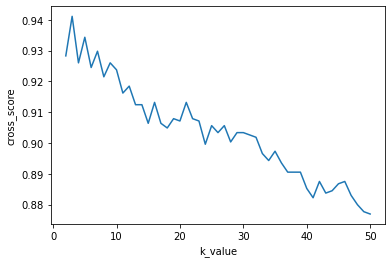

The best value of k is:  3
Running time is:  0:00:02.623409


In [137]:
#KNN for pair 1
start = datetime.datetime.now()
score = []
k_values = []
for k in range (2,51):
    knn = KNeighborsClassifier(n_neighbors = k)
    cross_score = cross_val_score(knn, x_train1, y_train1, cv = 5).mean()
    score.append(cross_score)
    k_values.append(k)

x_axis = np.array(k_values)
y_axis = np.array(score)
plt.plot(x_axis,y_axis)
plt.xlabel('k_value')
plt.ylabel('cross_score')
plt.show()

max_index = y_axis.argmax()
max_k = k_values[max_index]
print('The best value of k is: ', max_k)
end = datetime.datetime.now()
print('Running time is: ', end-start)

In [138]:
#Test for pair1
start = datetime.datetime.now()
knn_clf = KNeighborsClassifier(n_neighbors=max_k)
knn_clf.fit(x_test1,y_test1)
y_predict = knn_clf.predict(x_test1)
accuracy = accuracy_score(y_test1, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  0.9391891891891891
Running time is:  0:00:00.006522


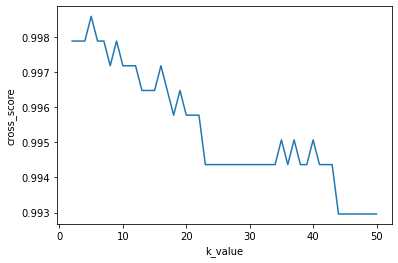

The best value of k is:  5
Running time is:  0:00:02.775636


In [139]:
#KNN for pair 2
start = datetime.datetime.now()
score = []
k_values = []
for k in range (2,51):
    knn = KNeighborsClassifier(n_neighbors = k)
    cross_score = cross_val_score(knn, x_train2, y_train2, cv = 5).mean()
    score.append(cross_score)
    k_values.append(k)

x_axis = np.array(k_values)
y_axis = np.array(score)
plt.plot(x_axis,y_axis)
plt.xlabel('k_value')
plt.ylabel('cross_score')
plt.show()

max_index = y_axis.argmax()
max_k = k_values[max_index]
print('The best value of k is: ', max_k)
end = datetime.datetime.now()
print('Running time is: ', end-start)

In [140]:
#Test for pair2
start = datetime.datetime.now()
knn_clf = KNeighborsClassifier(n_neighbors=max_k)
knn_clf.fit(x_test2,y_test2)
y_predict = knn_clf.predict(x_test2)
accuracy = accuracy_score(y_test2, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  1.0
Running time is:  0:00:00.005286


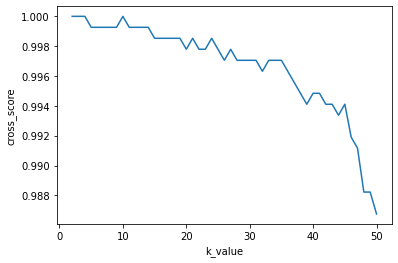

The best value of k is:  2
Running time is:  0:00:02.616591


In [141]:
#KNN for pair 3
start = datetime.datetime.now()
score = []
k_values = []
for k in range (2,51):
    knn = KNeighborsClassifier(n_neighbors = k)
    cross_score = cross_val_score(knn, x_train3, y_train3, cv = 5).mean()
    score.append(cross_score)
    k_values.append(k)

x_axis = np.array(k_values)
y_axis = np.array(score)
plt.plot(x_axis,y_axis)
plt.xlabel('k_value')
plt.ylabel('cross_score')
plt.show()

max_index = y_axis.argmax()
max_k = k_values[max_index]
print('The best value of k is: ', max_k)
end = datetime.datetime.now()
print('Running time is: ', end-start)

In [142]:
#Test for pair3
start = datetime.datetime.now()
knn_clf = KNeighborsClassifier(n_neighbors=max_k)
knn_clf.fit(x_test3,y_test3)
y_predict = knn_clf.predict(x_test3)
accuracy = accuracy_score(y_test3, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  0.9801324503311258
Running time is:  0:00:00.006290


(b) Decision Tree

In [143]:
from sklearn.tree import DecisionTreeClassifier

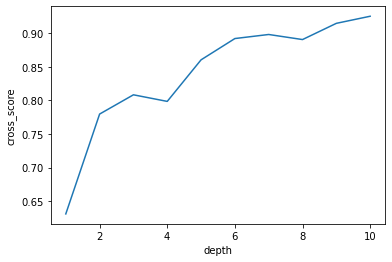

The best value of depth is:  10
Running time is:  0:00:00.152343


In [144]:
#Decision Tree for Pair 1
start = datetime.datetime.now()
score = []
d_values = []
for d in range(1,11):
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=d ,random_state=30, splitter='random')
    cross_score = cross_val_score(dt, x_train1, y_train1, cv = 5).mean()
    score.append(cross_score)
    d_values.append(d)
    
x_axis = np.array(d_values)
y_axis = np.array(score)
plt.plot(x_axis,y_axis)
plt.xlabel('depth')
plt.ylabel('cross_score')
plt.show()

max_index = y_axis.argmax()
max_d = d_values[max_index]
print('The best value of depth is: ', max_d)
end = datetime.datetime.now()
print('Running time is: ', end-start)

In [145]:
#Test for pair1
start = datetime.datetime.now()
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_d ,random_state=30, splitter='random')
dt_clf.fit(x_test1,y_test1)
y_predict = dt_clf.predict(x_test1)
accuracy = accuracy_score(y_test1, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  1.0
Running time is:  0:00:00.002048


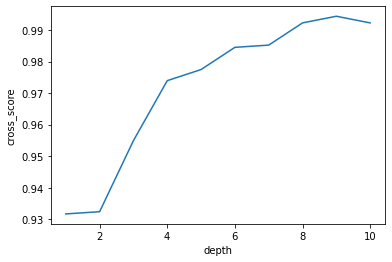

The best value of depth is:  9
Running time is:  0:00:00.149402


In [146]:
#Decision Tree for Pair 2
start = datetime.datetime.now()
score = []
d_values = []
for d in range(1,11):
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=d ,random_state=30, splitter='random')
    cross_score = cross_val_score(dt, x_train2, y_train2, cv = 5).mean()
    score.append(cross_score)
    d_values.append(d)
    
x_axis = np.array(d_values)
y_axis = np.array(score)
plt.plot(x_axis,y_axis)
plt.xlabel('depth')
plt.ylabel('cross_score')
plt.show()

max_index = y_axis.argmax()
max_d = d_values[max_index]
print('The best value of depth is: ', max_d)
end = datetime.datetime.now()
print('Running time is: ', end-start)

In [147]:
#Test for pair2
start = datetime.datetime.now()
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_d ,random_state=30, splitter='random')
dt_clf.fit(x_test2,y_test2)
y_predict = dt_clf.predict(x_test2)
accuracy = accuracy_score(y_test2, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  1.0
Running time is:  0:00:00.001354


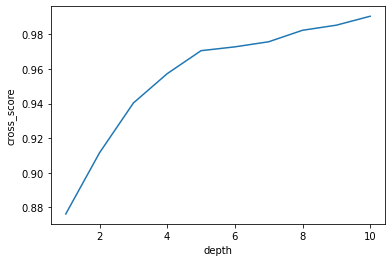

The best value of depth is:  10
Running time is:  0:00:00.140282


In [148]:
#Decision Tree for Pair 3
start = datetime.datetime.now()
score = []
d_values = []
for d in range(1,11):
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=d ,random_state=30, splitter='random')
    cross_score = cross_val_score(dt, x_train3, y_train3, cv = 5).mean()
    score.append(cross_score)
    d_values.append(d)
    
x_axis = np.array(d_values)
y_axis = np.array(score)
plt.plot(x_axis,y_axis)
plt.xlabel('depth')
plt.ylabel('cross_score')
plt.show()

max_index = y_axis.argmax()
max_d = d_values[max_index]
print('The best value of depth is: ', max_d)
end = datetime.datetime.now()
print('Running time is: ', end-start)

In [149]:
#Test for pair3
start = datetime.datetime.now()
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_d ,random_state=30, splitter='random')
dt_clf.fit(x_test3,y_test3)
y_predict = dt_clf.predict(x_test3)
accuracy = accuracy_score(y_test3, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  1.0
Running time is:  0:00:00.002377


(c) Random Forest

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

The best value of tree numbers is:  50
The best value of depth is:  11
The best value of samples_split is:  50
The best score is: 0.9755866940077466
Running time is:  0:00:12.088108


<AxesSubplot:>

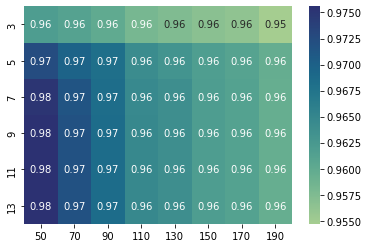

In [151]:
#Random Forest for Pair 1
start = datetime.datetime.now()
param_test1 = {'n_estimators':range(10,71,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(x_train1,y_train1)

param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(50,201,20)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 50, 
                                  min_samples_leaf=20,random_state=10),
   param_grid = param_test2, scoring='roc_auc', cv=5)
gsearch2.fit(x_train1,y_train1)

print('The best value of tree numbers is: ', gsearch1.best_params_['n_estimators'])
print('The best value of depth is: ', gsearch2.best_params_['max_depth'])
print('The best value of samples_split is: ', gsearch2.best_params_['min_samples_split'])
print('The best score is:',gsearch2.best_score_)
end = datetime.datetime.now()
print('Running time is: ',end-start)
depth = np.array(range(3,14,2))
samples_split = np.array(range(50,201,20))
score = gsearch2.cv_results_['mean_test_score']
score_mat = np.array_split(score,6)
df=pd.DataFrame(score_mat)
df.columns = samples_split
df.index = depth
sns.heatmap(df, cmap = 'crest', annot = True)

In [152]:
#Test for Pair 1
best_est = gsearch1.best_params_['n_estimators']
best_depth = gsearch2.best_params_['max_depth']
best_samplesplit = gsearch2.best_params_['min_samples_split']
start = datetime.datetime.now()
rf_clf = RandomForestClassifier(n_estimators= best_est, max_depth=best_depth, min_samples_leaf=20,
                                min_samples_split=best_samplesplit,random_state=10)
rf_clf.fit(x_test1,y_test1)
y_predict = rf_clf.predict(x_test1)
accuracy = accuracy_score(y_test1, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  0.8648648648648649
Running time is:  0:00:00.036845


The best value of tree numbers is:  70
The best value of depth is:  7
The best value of samples_split is:  50
The best score is: 0.999355276319067
Running time is:  0:00:16.222387


<AxesSubplot:>

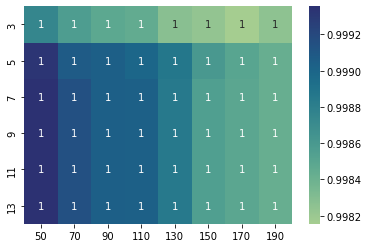

In [153]:
#Random Forest for Pair 2
start = datetime.datetime.now()
param_test1 = {'n_estimators':range(10,71,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(x_train2,y_train2)
best_est = gsearch1.best_params_['n_estimators']

param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(50,201,20)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= best_est, 
                                  min_samples_leaf=20,random_state=10),
   param_grid = param_test2, scoring='roc_auc', cv=5)
gsearch2.fit(x_train2,y_train2)

print('The best value of tree numbers is: ', gsearch1.best_params_['n_estimators'])
print('The best value of depth is: ', gsearch2.best_params_['max_depth'])
print('The best value of samples_split is: ', gsearch2.best_params_['min_samples_split'])
print('The best score is:',gsearch2.best_score_)
end = datetime.datetime.now()
print('Running time is: ',end-start)
depth = np.array(range(3,14,2))
samples_split = np.array(range(50,201,20))
score = gsearch2.cv_results_['mean_test_score']
score_mat = np.array_split(score,6)
df=pd.DataFrame(score_mat)
df.columns = samples_split
df.index = depth
sns.heatmap(df, cmap = 'crest', annot = True)

In [154]:
#Test for Pair 2
best_est = gsearch1.best_params_['n_estimators']
best_depth = gsearch2.best_params_['max_depth']
best_samplesplit = gsearch2.best_params_['min_samples_split']
start = datetime.datetime.now()
rf_clf = RandomForestClassifier(n_estimators= best_est, max_depth=best_depth, min_samples_leaf=20,
                                min_samples_split=best_samplesplit,random_state=10)
rf_clf.fit(x_test2,y_test2)
y_predict = rf_clf.predict(x_test2)
accuracy = accuracy_score(y_test2, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  0.9683544303797469
Running time is:  0:00:00.050853


The best value of tree numbers is:  70
The best value of depth is:  5
The best value of samples_split is:  50
The best score is: 0.9991404065371435
Running time is:  0:00:15.954283


<AxesSubplot:>

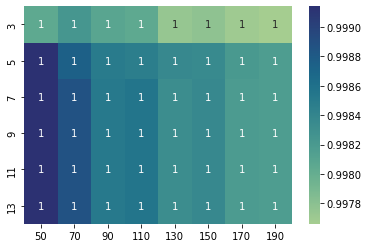

In [155]:
#Random Forest for Pair 3
start = datetime.datetime.now()
param_test1 = {'n_estimators':range(10,71,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(x_train3,y_train3)
best_est = gsearch1.best_params_['n_estimators']

param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(50,201,20)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= best_est, 
                                  min_samples_leaf=20,random_state=10),
   param_grid = param_test2, scoring='roc_auc', cv=5)
gsearch2.fit(x_train3,y_train3)

print('The best value of tree numbers is: ', gsearch1.best_params_['n_estimators'])
print('The best value of depth is: ', gsearch2.best_params_['max_depth'])
print('The best value of samples_split is: ', gsearch2.best_params_['min_samples_split'])
print('The best score is:',gsearch2.best_score_)
end = datetime.datetime.now()
print('Running time is: ',end-start)
depth = np.array(range(3,14,2))
samples_split = np.array(range(50,201,20))
score = gsearch2.cv_results_['mean_test_score']
score_mat = np.array_split(score,6)
df=pd.DataFrame(score_mat)
df.columns = samples_split
df.index = depth
sns.heatmap(df, cmap = 'crest', annot = True)

In [156]:
#Test for Pair 3
best_est = gsearch1.best_params_['n_estimators']
best_depth = gsearch2.best_params_['max_depth']
best_samplesplit = gsearch2.best_params_['min_samples_split']
start = datetime.datetime.now()
rf_clf = RandomForestClassifier(n_estimators= best_est, max_depth=best_depth, min_samples_leaf=20,
                                min_samples_split=best_samplesplit,random_state=10)
rf_clf.fit(x_test3,y_test3)
y_predict = rf_clf.predict(x_test3)
accuracy = accuracy_score(y_test3, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  0.9536423841059603
Running time is:  0:00:00.050940


(d) SVM

In [157]:
from sklearn import svm

Fitting 5 folds for each of 40 candidates, totalling 200 fits
The best value of C is:  10
The best value of gamma is:  5
The best score is: 0.998598769651401
Running time is:  0:00:11.705529


<AxesSubplot:>

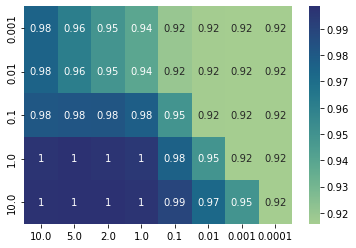

In [160]:
#SVM for Pair 1
start = datetime.datetime.now()
param_test = {'C': [1e-3, 1e-2, 1e-1, 1, 10], 'gamma': [10, 5, 2, 1, 0.1, 0.01, 0.001, 0.0001]} 
gsearch = GridSearchCV(estimator = svm.SVC(kernel = 'rbf',probability=True),
                       param_grid = param_test, scoring='roc_auc', cv=5,
                      n_jobs = 8, verbose=1)
gsearch.fit(x_train1,y_train1)
best_c = gsearch.best_params_['C']
best_g = gsearch.best_params_['gamma']

print('The best value of C is: ', gsearch.best_params_['C'])
print('The best value of gamma is: ', gsearch.best_params_['gamma'])
print('The best score is:',gsearch.best_score_)
end = datetime.datetime.now()
print('Running time is: ',end-start)
cost = np.array([1e-3, 1e-2, 1e-1, 1, 10])
gamma = np.array([10, 5, 2, 1, 0.1, 0.01, 0.001, 0.0001])
score = gsearch.cv_results_['mean_test_score']
score_mat = np.array_split(score,5)
df=pd.DataFrame(score_mat)
df.columns = gamma
df.index = cost
sns.heatmap(df, cmap = 'crest', annot = True)

In [161]:
#Test for Pair 1
start = datetime.datetime.now()
svm_clf = svm.SVC(kernel = 'rbf',probability=True,C = best_c,gamma=best_g)
svm_clf.fit(x_test1,y_test1)
y_predict = svm_clf.predict(x_test1)
accuracy = accuracy_score(y_test1, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  1.0
Running time is:  0:00:00.027516


Fitting 5 folds for each of 40 candidates, totalling 200 fits
The best value of C is:  1
The best value of gamma is:  10
The best score is: 1.0
Running time is:  0:00:09.902449


<AxesSubplot:>

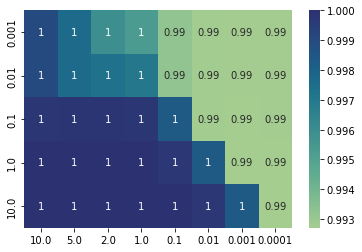

In [162]:
#SVM for Pair 2
start = datetime.datetime.now()
param_test = {'C': [1e-3, 1e-2, 1e-1, 1, 10], 'gamma': [10, 5, 2, 1, 0.1, 0.01, 0.001, 0.0001]} 
gsearch = GridSearchCV(estimator = svm.SVC(kernel = 'rbf',probability=True),
                       param_grid = param_test, scoring='roc_auc', cv=5,
                      n_jobs = 8, verbose=1)
gsearch.fit(x_train2,y_train2)
best_c = gsearch.best_params_['C']
best_g = gsearch.best_params_['gamma']

print('The best value of C is: ', gsearch.best_params_['C'])
print('The best value of gamma is: ', gsearch.best_params_['gamma'])
print('The best score is:',gsearch.best_score_)
end = datetime.datetime.now()
print('Running time is: ',end-start)
cost = np.array([1e-3, 1e-2, 1e-1, 1, 10])
gamma = np.array([10, 5, 2, 1, 0.1, 0.01, 0.001, 0.0001])
score = gsearch.cv_results_['mean_test_score']
score_mat = np.array_split(score,5)
df=pd.DataFrame(score_mat)
df.columns = gamma
df.index = cost
sns.heatmap(df, cmap = 'crest', annot = True)

In [163]:
#Test for Pair 2
start = datetime.datetime.now()
svm_clf = svm.SVC(kernel = 'rbf',probability=True,C = best_c,gamma=best_g)
svm_clf.fit(x_test2,y_test2)
y_predict = svm_clf.predict(x_test2)
accuracy = accuracy_score(y_test2, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  1.0
Running time is:  0:00:00.012303


Fitting 5 folds for each of 40 candidates, totalling 200 fits
The best value of C is:  0.001
The best value of gamma is:  10
The best score is: 1.0
Running time is:  0:00:09.566362


<AxesSubplot:>

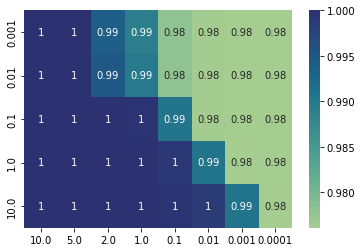

In [164]:
#SVM for Pair 3
start = datetime.datetime.now()
param_test = {'C': [1e-3, 1e-2, 1e-1, 1, 10], 'gamma': [10, 5, 2, 1, 0.1, 0.01, 0.001, 0.0001]} 
gsearch = GridSearchCV(estimator = svm.SVC(kernel = 'rbf',probability=True),
                       param_grid = param_test, scoring='roc_auc', cv=5,
                      n_jobs = 8, verbose=1)
gsearch.fit(x_train3,y_train3)
best_c = gsearch.best_params_['C']
best_g = gsearch.best_params_['gamma']

print('The best value of C is: ', gsearch.best_params_['C'])
print('The best value of gamma is: ', gsearch.best_params_['gamma'])
print('The best score is:',gsearch.best_score_)
end = datetime.datetime.now()
print('Running time is: ',end-start)
cost = np.array([1e-3, 1e-2, 1e-1, 1, 10])
gamma = np.array([10, 5, 2, 1, 0.1, 0.01, 0.001, 0.0001])
score = gsearch.cv_results_['mean_test_score']
score_mat = np.array_split(score,5)
df=pd.DataFrame(score_mat)
df.columns = gamma
df.index = cost
sns.heatmap(df, cmap = 'crest', annot = True)

In [165]:
#Test for Pair 3
start = datetime.datetime.now()
svm_clf = svm.SVC(kernel = 'rbf',probability=True,C = best_c,gamma=best_g)
svm_clf.fit(x_test3,y_test3)
y_predict = svm_clf.predict(x_test3)
accuracy = accuracy_score(y_test3, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  0.543046357615894
Running time is:  0:00:00.010625


(5) ANN

/Users/zhuoyunchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zhuoyunchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zhuoyunchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zhuoyunchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


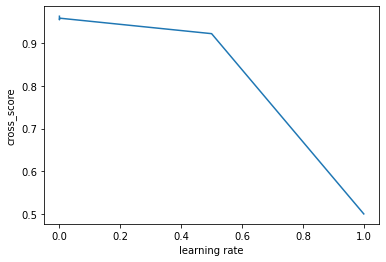

The best learning rate is:  1e-08
Running time is:  0:01:01.545736


In [199]:
#ANN for Pair 1
from sklearn.neural_network import MLPClassifier
start = datetime.datetime.now()
score5 = []
#hidden_layer number ;
# can also tune the number of neurons on each layer
# the activation function
# the learning rate
lr_list = [1,0.5,0.001,1e-5,1e-8]
for i in lr_list:
    clf = MLPClassifier(solver='adam', alpha = i,hidden_layer_sizes = (10,5,2), random_state=1,max_iter = 800)
    cross_score5 = cross_val_score(clf, x_train1,y_train1,cv = 5).mean()
    score5.append(cross_score5)

lr_array = np.array(lr_list)
score5_array = np.array(score5)
plt.plot(lr_array, score5_array)
plt.xlabel('learning rate')
plt.ylabel('cross_score')
plt.show()
max_index5 = score5_array.argmax()
best_lr = lr_list[max_index5]
print('The best learning rate is: ', best_lr)
end = datetime.datetime.now()
print('Running time is: ',end-start)

In [200]:
start = datetime.datetime.now()
ann_clf = MLPClassifier(solver='adam', alpha = best_lr,hidden_layer_sizes = (10,5,2), random_state=1,max_iter = 800)
ann_clf.fit(x_test1,y_test1)
y_predict = ann_clf.predict(x_test1)
print(accuracy_score(y_test1,y_predict))
end = datetime.datetime.now()
print('Running time is: ',end-start)

0.5135135135135135
Running time is:  0:00:00.585863


/Users/zhuoyunchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/zhuoyunchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zhuoyunchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zhuoyunchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zhuoyunchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


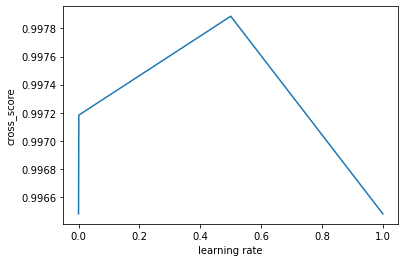

The best learning rate is:  0.5
Running time is:  0:01:29.529569


In [201]:
#ANN for Pair 2
start = datetime.datetime.now()
score5 = []
lr_list = [1,0.5,0.001,1e-5,1e-8]
for i in lr_list:
    clf = MLPClassifier(solver='adam', alpha = i,hidden_layer_sizes = (10,5,2), random_state=1,max_iter = 800)
    cross_score5 = cross_val_score(clf, x_train2,y_train2,cv = 5).mean()
    score5.append(cross_score5)

lr_array = np.array(lr_list)
score5_array = np.array(score5)
plt.plot(lr_array, score5_array)
plt.xlabel('learning rate')
plt.ylabel('cross_score')
plt.show()
max_index5 = score5_array.argmax()
best_lr = lr_list[max_index5]
print('The best learning rate is: ', best_lr)
end = datetime.datetime.now()
print('Running time is: ',end-start)

In [202]:
start = datetime.datetime.now()
ann_clf = MLPClassifier(solver='adam', alpha = best_lr,hidden_layer_sizes = (10,5,2), random_state=1,max_iter = 800)
ann_clf.fit(x_test2,y_test2)
y_predict = ann_clf.predict(x_test2)
print(accuracy_score(y_test2,y_predict))
end = datetime.datetime.now()
print('Running time is: ',end-start)

0.47468354430379744
Running time is:  0:00:00.588074


/Users/zhuoyunchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/zhuoyunchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zhuoyunchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zhuoyunchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zhuoyunchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


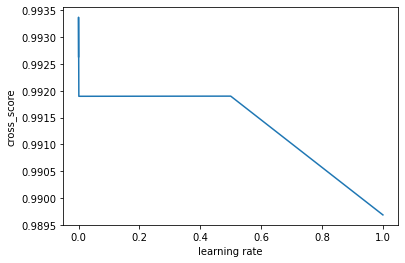

The best learning rate is:  1e-05
Running time is:  0:01:14.656002


In [203]:
#ANN for Pair 3
start = datetime.datetime.now()
score5 = []
lr_list = [1,0.5,0.001,1e-5,1e-8]
for i in lr_list:
    clf = MLPClassifier(solver='adam', alpha = i,hidden_layer_sizes = (10,5,2), random_state=1,max_iter = 800)
    cross_score5 = cross_val_score(clf, x_train3,y_train3,cv = 5).mean()
    score5.append(cross_score5)

lr_array = np.array(lr_list)
score5_array = np.array(score5)
plt.plot(lr_array, score5_array)
plt.xlabel('learning rate')
plt.ylabel('cross_score')
plt.show()
max_index5 = score5_array.argmax()
best_lr = lr_list[max_index5]
print('The best learning rate is: ', best_lr)
end = datetime.datetime.now()
print('Running time is: ',end-start)

In [204]:
start = datetime.datetime.now()
ann_clf = MLPClassifier(solver='adam', alpha = best_lr,hidden_layer_sizes = (10,5,2), random_state=1,max_iter = 800)
ann_clf.fit(x_test3,y_test3)
y_predict = ann_clf.predict(x_test3)
print(accuracy_score(y_test3,y_predict))
end = datetime.datetime.now()
print('Running time is: ',end-start)

0.45695364238410596
Running time is:  0:00:00.584623


/Users/zhuoyunchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Dimension Reduction

PCA Method

In [168]:
from sklearn.decomposition import PCA

In [169]:
#Training Data
pca_train = PCA(n_components=4)
pca_train.fit(x_train1)
pca_train.fit(x_train2)
pca_train.fit(x_train3)
x_pca_train1 = pca_train.fit_transform(x_train1)
x_pca_train2 = pca_train.fit_transform(x_train2)
x_pca_train3 = pca_train.fit_transform(x_train3)

In [171]:
#Testing Data
pca_test = PCA(n_components=4)
pca_test.fit(x_test1)
pca_test.fit(x_test2)
pca_test.fit(x_test3)
x_pca_test1 = pca_train.fit_transform(x_test1)
x_pca_test2 = pca_train.fit_transform(x_test2)
x_pca_test3 = pca_train.fit_transform(x_test3)

KNN

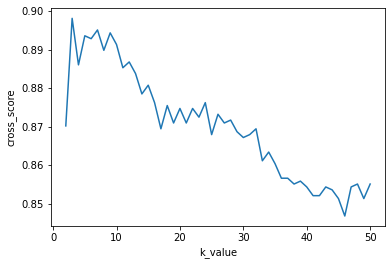

The best value of k is:  3
Running time is:  0:00:01.730136


In [173]:
#KNN for pair 1
start = datetime.datetime.now()
score = []
k_values = []
for k in range (2,51):
    knn = KNeighborsClassifier(n_neighbors = k)
    cross_score = cross_val_score(knn, x_pca_train1, y_train1, cv = 5).mean()
    score.append(cross_score)
    k_values.append(k)

x_axis = np.array(k_values)
y_axis = np.array(score)
plt.plot(x_axis,y_axis)
plt.xlabel('k_value')
plt.ylabel('cross_score')
plt.show()

max_index = y_axis.argmax()
max_k = k_values[max_index]
print('The best value of k is: ', max_k)
end = datetime.datetime.now()
print('Running time is: ', end-start)

In [175]:
#Test for pair1
start = datetime.datetime.now()
knn_clf = KNeighborsClassifier(n_neighbors=max_k)
knn_clf.fit(x_pca_test1,y_test1)
y_predict = knn_clf.predict(x_pca_test1)
accuracy = accuracy_score(y_test1, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  0.9054054054054054
Running time is:  0:00:00.011724


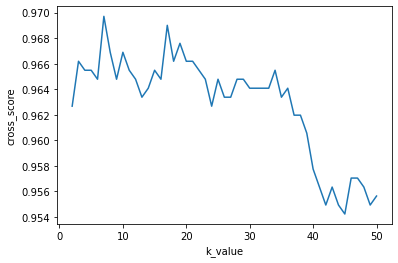

The best value of k is:  7
Running time is:  0:00:01.835780


In [176]:
#KNN for pair 2
start = datetime.datetime.now()
score = []
k_values = []
for k in range (2,51):
    knn = KNeighborsClassifier(n_neighbors = k)
    cross_score = cross_val_score(knn, x_pca_train2, y_train2, cv = 5).mean()
    score.append(cross_score)
    k_values.append(k)

x_axis = np.array(k_values)
y_axis = np.array(score)
plt.plot(x_axis,y_axis)
plt.xlabel('k_value')
plt.ylabel('cross_score')
plt.show()

max_index = y_axis.argmax()
max_k = k_values[max_index]
print('The best value of k is: ', max_k)
end = datetime.datetime.now()
print('Running time is: ', end-start)

In [178]:
#Test for pair2
start = datetime.datetime.now()
knn_clf = KNeighborsClassifier(n_neighbors=max_k)
knn_clf.fit(x_pca_test2,y_test2)
y_predict = knn_clf.predict(x_pca_test2)
accuracy = accuracy_score(y_test2, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  0.9936708860759493
Running time is:  0:00:00.018840


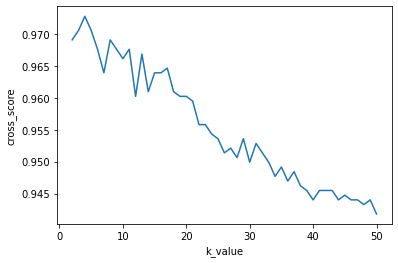

The best value of k is:  4
Running time is:  0:00:01.749571


In [179]:
#KNN for pair 3
start = datetime.datetime.now()
score = []
k_values = []
for k in range (2,51):
    knn = KNeighborsClassifier(n_neighbors = k)
    cross_score = cross_val_score(knn, x_pca_train3, y_train3, cv = 5).mean()
    score.append(cross_score)
    k_values.append(k)

x_axis = np.array(k_values)
y_axis = np.array(score)
plt.plot(x_axis,y_axis)
plt.xlabel('k_value')
plt.ylabel('cross_score')
plt.show()

max_index = y_axis.argmax()
max_k = k_values[max_index]
print('The best value of k is: ', max_k)
end = datetime.datetime.now()
print('Running time is: ', end-start)

In [180]:
#Test for pair3
start = datetime.datetime.now()
knn_clf = KNeighborsClassifier(n_neighbors=max_k)
knn_clf.fit(x_pca_test3,y_test3)
y_predict = knn_clf.predict(x_pca_test3)
accuracy = accuracy_score(y_test3, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  0.9668874172185431
Running time is:  0:00:00.011862


Decision Tree

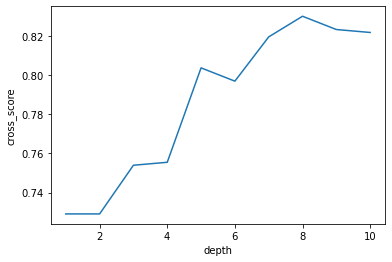

The best value of depth is:  8
Running time is:  0:00:00.163037


In [181]:
#Decision Tree for Pair 1
start = datetime.datetime.now()
score = []
d_values = []
for d in range(1,11):
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=d ,random_state=30, splitter='random')
    cross_score = cross_val_score(dt, x_pca_train1, y_train1, cv = 5).mean()
    score.append(cross_score)
    d_values.append(d)
    
x_axis = np.array(d_values)
y_axis = np.array(score)
plt.plot(x_axis,y_axis)
plt.xlabel('depth')
plt.ylabel('cross_score')
plt.show()

max_index = y_axis.argmax()
max_d = d_values[max_index]
print('The best value of depth is: ', max_d)
end = datetime.datetime.now()
print('Running time is: ', end-start)

In [182]:
#Test for pair1
start = datetime.datetime.now()
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_d ,random_state=30, splitter='random')
dt_clf.fit(x_pca_test1,y_test1)
y_predict = dt_clf.predict(x_pca_test1)
accuracy = accuracy_score(y_test1, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  0.9527027027027027
Running time is:  0:00:00.005951


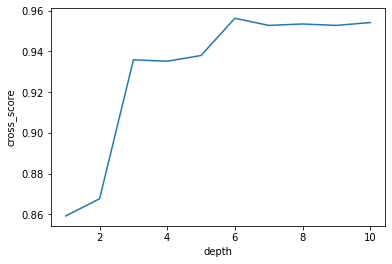

The best value of depth is:  6
Running time is:  0:00:00.160064


In [183]:
#Decision Tree for Pair 2
start = datetime.datetime.now()
score = []
d_values = []
for d in range(1,11):
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=d ,random_state=30, splitter='random')
    cross_score = cross_val_score(dt, x_pca_train2, y_train2, cv = 5).mean()
    score.append(cross_score)
    d_values.append(d)
    
x_axis = np.array(d_values)
y_axis = np.array(score)
plt.plot(x_axis,y_axis)
plt.xlabel('depth')
plt.ylabel('cross_score')
plt.show()

max_index = y_axis.argmax()
max_d = d_values[max_index]
print('The best value of depth is: ', max_d)
end = datetime.datetime.now()
print('Running time is: ', end-start)

In [184]:
#Test for pair2
start = datetime.datetime.now()
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_d ,random_state=30, splitter='random')
dt_clf.fit(x_pca_test2,y_test2)
y_predict = dt_clf.predict(x_pca_test2)
accuracy = accuracy_score(y_test2, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  0.9936708860759493
Running time is:  0:00:00.007420


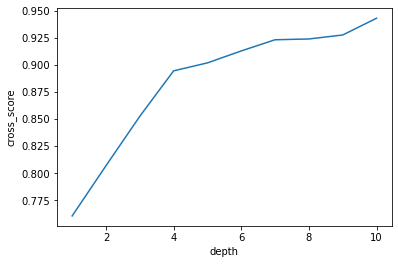

The best value of depth is:  10
Running time is:  0:00:00.160279


In [185]:
#Decision Tree for Pair 3
start = datetime.datetime.now()
score = []
d_values = []
for d in range(1,11):
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=d ,random_state=30, splitter='random')
    cross_score = cross_val_score(dt, x_pca_train3, y_train3, cv = 5).mean()
    score.append(cross_score)
    d_values.append(d)
    
x_axis = np.array(d_values)
y_axis = np.array(score)
plt.plot(x_axis,y_axis)
plt.xlabel('depth')
plt.ylabel('cross_score')
plt.show()

max_index = y_axis.argmax()
max_d = d_values[max_index]
print('The best value of depth is: ', max_d)
end = datetime.datetime.now()
print('Running time is: ', end-start)

In [186]:
#Test for pair3
start = datetime.datetime.now()
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_d ,random_state=30, splitter='random')
dt_clf.fit(x_pca_test3,y_test3)
y_predict = dt_clf.predict(x_pca_test3)
accuracy = accuracy_score(y_test3, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  1.0
Running time is:  0:00:00.005561


Random Forest

The best value of tree numbers is:  70
The best value of depth is:  11
The best value of samples_split is:  50
The best score is: 0.9428343586238324
Running time is:  0:00:14.444788


<AxesSubplot:>

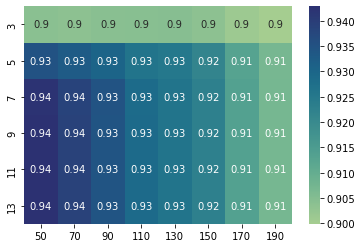

In [187]:
#Random Forest for Pair 1
start = datetime.datetime.now()
param_test1 = {'n_estimators':range(10,71,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(x_pca_train1,y_train1)

param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(50,201,20)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 50, 
                                  min_samples_leaf=20,random_state=10),
   param_grid = param_test2, scoring='roc_auc', cv=5)
gsearch2.fit(x_pca_train1,y_train1)

print('The best value of tree numbers is: ', gsearch1.best_params_['n_estimators'])
print('The best value of depth is: ', gsearch2.best_params_['max_depth'])
print('The best value of samples_split is: ', gsearch2.best_params_['min_samples_split'])
print('The best score is:',gsearch2.best_score_)
end = datetime.datetime.now()
print('Running time is: ',end-start)
depth = np.array(range(3,14,2))
samples_split = np.array(range(50,201,20))
score = gsearch2.cv_results_['mean_test_score']
score_mat = np.array_split(score,6)
df=pd.DataFrame(score_mat)
df.columns = samples_split
df.index = depth
sns.heatmap(df, cmap = 'crest', annot = True)

In [188]:
#Test for Pair 1
best_est = gsearch1.best_params_['n_estimators']
best_depth = gsearch2.best_params_['max_depth']
best_samplesplit = gsearch2.best_params_['min_samples_split']
start = datetime.datetime.now()
rf_clf = RandomForestClassifier(n_estimators= best_est, max_depth=best_depth, min_samples_leaf=20,
                                min_samples_split=best_samplesplit,random_state=10)
rf_clf.fit(x_pca_test1,y_test1)
y_predict = rf_clf.predict(x_pca_test1)
accuracy = accuracy_score(y_test1, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  0.9121621621621622
Running time is:  0:00:00.078302


The best value of tree numbers is:  20
The best value of depth is:  9
The best value of samples_split is:  50
The best score is: 0.9905572780608131
Running time is:  0:00:07.104425


<AxesSubplot:>

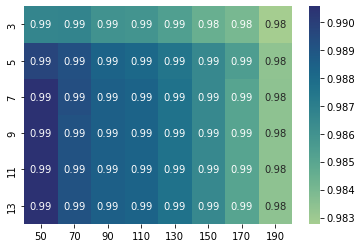

In [189]:
#Random Forest for Pair 2
start = datetime.datetime.now()
param_test1 = {'n_estimators':range(10,71,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(x_pca_train2,y_train2)
best_est = gsearch1.best_params_['n_estimators']

param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(50,201,20)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= best_est, 
                                  min_samples_leaf=20,random_state=10),
   param_grid = param_test2, scoring='roc_auc', cv=5)
gsearch2.fit(x_pca_train2,y_train2)

print('The best value of tree numbers is: ', gsearch1.best_params_['n_estimators'])
print('The best value of depth is: ', gsearch2.best_params_['max_depth'])
print('The best value of samples_split is: ', gsearch2.best_params_['min_samples_split'])
print('The best score is:',gsearch2.best_score_)
end = datetime.datetime.now()
print('Running time is: ',end-start)
depth = np.array(range(3,14,2))
samples_split = np.array(range(50,201,20))
score = gsearch2.cv_results_['mean_test_score']
score_mat = np.array_split(score,6)
df=pd.DataFrame(score_mat)
df.columns = samples_split
df.index = depth
sns.heatmap(df, cmap = 'crest', annot = True)

In [190]:
#Test for Pair 2
best_est = gsearch1.best_params_['n_estimators']
best_depth = gsearch2.best_params_['max_depth']
best_samplesplit = gsearch2.best_params_['min_samples_split']
start = datetime.datetime.now()
rf_clf = RandomForestClassifier(n_estimators= best_est, max_depth=best_depth, min_samples_leaf=20,
                                min_samples_split=best_samplesplit,random_state=10)
rf_clf.fit(x_pca_test2,y_test2)
y_predict = rf_clf.predict(x_pca_test2)
accuracy = accuracy_score(y_test2, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  0.9177215189873418
Running time is:  0:00:00.028457


The best value of tree numbers is:  70
The best value of depth is:  7
The best value of samples_split is:  50
The best score is: 0.9908564812092792
Running time is:  0:00:18.894003


<AxesSubplot:>

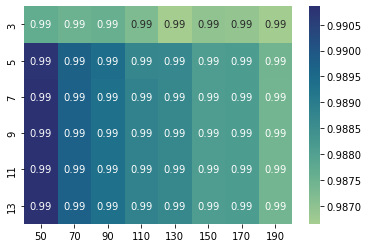

In [191]:
#Random Forest for Pair 3
start = datetime.datetime.now()
param_test1 = {'n_estimators':range(10,71,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(x_pca_train3,y_train3)
best_est = gsearch1.best_params_['n_estimators']

param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(50,201,20)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= best_est, 
                                  min_samples_leaf=20,random_state=10),
   param_grid = param_test2, scoring='roc_auc', cv=5)
gsearch2.fit(x_pca_train3,y_train3)

print('The best value of tree numbers is: ', gsearch1.best_params_['n_estimators'])
print('The best value of depth is: ', gsearch2.best_params_['max_depth'])
print('The best value of samples_split is: ', gsearch2.best_params_['min_samples_split'])
print('The best score is:',gsearch2.best_score_)
end = datetime.datetime.now()
print('Running time is: ',end-start)
depth = np.array(range(3,14,2))
samples_split = np.array(range(50,201,20))
score = gsearch2.cv_results_['mean_test_score']
score_mat = np.array_split(score,6)
df=pd.DataFrame(score_mat)
df.columns = samples_split
df.index = depth
sns.heatmap(df, cmap = 'crest', annot = True)

In [192]:
#Test for Pair 3
best_est = gsearch1.best_params_['n_estimators']
best_depth = gsearch2.best_params_['max_depth']
best_samplesplit = gsearch2.best_params_['min_samples_split']
start = datetime.datetime.now()
rf_clf = RandomForestClassifier(n_estimators= best_est, max_depth=best_depth, min_samples_leaf=20,
                                min_samples_split=best_samplesplit,random_state=10)
rf_clf.fit(x_pca_test3,y_test3)
y_predict = rf_clf.predict(x_pca_test3)
accuracy = accuracy_score(y_test3, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  0.9602649006622517
Running time is:  0:00:00.068966


SVM

Fitting 5 folds for each of 40 candidates, totalling 200 fits
The best value of C is:  1
The best value of gamma is:  10
The best score is: 0.9610845295055821
Running time is:  0:00:10.869489


<AxesSubplot:>

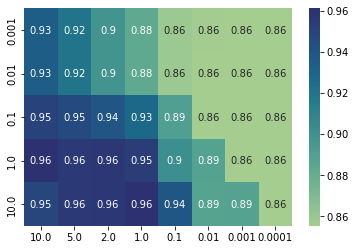

In [193]:
#SVM for Pair 1
start = datetime.datetime.now()
param_test = {'C': [1e-3, 1e-2, 1e-1, 1, 10], 'gamma': [10, 5, 2, 1, 0.1, 0.01, 0.001, 0.0001]} 
gsearch = GridSearchCV(estimator = svm.SVC(kernel = 'rbf',probability=True),
                       param_grid = param_test, scoring='roc_auc', cv=5,
                      n_jobs = 8, verbose=1)
gsearch.fit(x_pca_train1,y_train1)
best_c = gsearch.best_params_['C']
best_g = gsearch.best_params_['gamma']

print('The best value of C is: ', gsearch.best_params_['C'])
print('The best value of gamma is: ', gsearch.best_params_['gamma'])
print('The best score is:',gsearch.best_score_)
end = datetime.datetime.now()
print('Running time is: ',end-start)
cost = np.array([1e-3, 1e-2, 1e-1, 1, 10])
gamma = np.array([10, 5, 2, 1, 0.1, 0.01, 0.001, 0.0001])
score = gsearch.cv_results_['mean_test_score']
score_mat = np.array_split(score,5)
df=pd.DataFrame(score_mat)
df.columns = gamma
df.index = cost
sns.heatmap(df, cmap = 'crest', annot = True)

In [194]:
#Test for Pair 1
start = datetime.datetime.now()
svm_clf = svm.SVC(kernel = 'rbf',probability=True,C = best_c,gamma=best_g)
svm_clf.fit(x_pca_test1,y_test1)
y_predict = svm_clf.predict(x_pca_test1)
accuracy = accuracy_score(y_test1, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  0.9459459459459459
Running time is:  0:00:00.017871


Fitting 5 folds for each of 40 candidates, totalling 200 fits
The best value of C is:  10
The best value of gamma is:  0.1
The best score is: 0.99319564789182
Running time is:  0:00:08.280945


<AxesSubplot:>

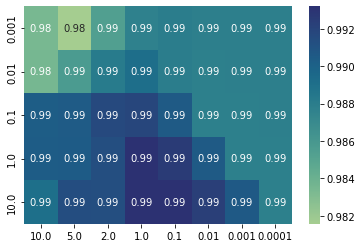

In [195]:
#SVM for Pair 2
start = datetime.datetime.now()
param_test = {'C': [1e-3, 1e-2, 1e-1, 1, 10], 'gamma': [10, 5, 2, 1, 0.1, 0.01, 0.001, 0.0001]} 
gsearch = GridSearchCV(estimator = svm.SVC(kernel = 'rbf',probability=True),
                       param_grid = param_test, scoring='roc_auc', cv=5,
                      n_jobs = 8, verbose=1)
gsearch.fit(x_pca_train2,y_train2)
best_c = gsearch.best_params_['C']
best_g = gsearch.best_params_['gamma']

print('The best value of C is: ', gsearch.best_params_['C'])
print('The best value of gamma is: ', gsearch.best_params_['gamma'])
print('The best score is:',gsearch.best_score_)
end = datetime.datetime.now()
print('Running time is: ',end-start)
cost = np.array([1e-3, 1e-2, 1e-1, 1, 10])
gamma = np.array([10, 5, 2, 1, 0.1, 0.01, 0.001, 0.0001])
score = gsearch.cv_results_['mean_test_score']
score_mat = np.array_split(score,5)
df=pd.DataFrame(score_mat)
df.columns = gamma
df.index = cost
sns.heatmap(df, cmap = 'crest', annot = True)

In [196]:
#Test for Pair 2
start = datetime.datetime.now()
svm_clf = svm.SVC(kernel = 'rbf',probability=True,C = best_c,gamma=best_g)
svm_clf.fit(x_pca_test2,y_test2)
y_predict = svm_clf.predict(x_pca_test2)
accuracy = accuracy_score(y_test2, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  0.9873417721518988
Running time is:  0:00:00.009147


Fitting 5 folds for each of 40 candidates, totalling 200 fits
The best value of C is:  10
The best value of gamma is:  2
The best score is: 0.9955934565848465
Running time is:  0:00:07.826988


<AxesSubplot:>

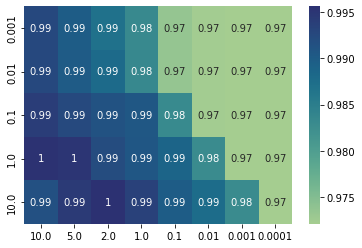

In [197]:
#SVM for Pair 3
start = datetime.datetime.now()
param_test = {'C': [1e-3, 1e-2, 1e-1, 1, 10], 'gamma': [10, 5, 2, 1, 0.1, 0.01, 0.001, 0.0001]} 
gsearch = GridSearchCV(estimator = svm.SVC(kernel = 'rbf',probability=True),
                       param_grid = param_test, scoring='roc_auc', cv=5,
                      n_jobs = 8, verbose=1)
gsearch.fit(x_pca_train3,y_train3)
best_c = gsearch.best_params_['C']
best_g = gsearch.best_params_['gamma']

print('The best value of C is: ', gsearch.best_params_['C'])
print('The best value of gamma is: ', gsearch.best_params_['gamma'])
print('The best score is:',gsearch.best_score_)
end = datetime.datetime.now()
print('Running time is: ',end-start)
cost = np.array([1e-3, 1e-2, 1e-1, 1, 10])
gamma = np.array([10, 5, 2, 1, 0.1, 0.01, 0.001, 0.0001])
score = gsearch.cv_results_['mean_test_score']
score_mat = np.array_split(score,5)
df=pd.DataFrame(score_mat)
df.columns = gamma
df.index = cost
sns.heatmap(df, cmap = 'crest', annot = True)

In [198]:
#Test for Pair 3
start = datetime.datetime.now()
svm_clf = svm.SVC(kernel = 'rbf',probability=True,C = best_c,gamma=best_g)
svm_clf.fit(x_pca_test3,y_test3)
y_predict = svm_clf.predict(x_pca_test3)
accuracy = accuracy_score(y_test3, y_predict)
print('The accuracy score for the test data is: ',accuracy)
end = datetime.datetime.now()
print('Running time is: ', end-start)

The accuracy score for the test data is:  0.9933774834437086
Running time is:  0:00:00.009596


(5) ANN

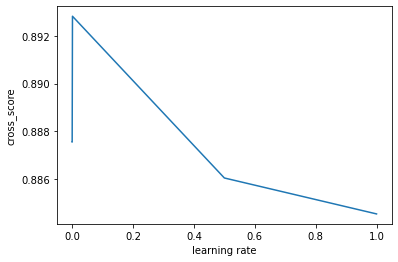

The best learning rate is:  0.001
Running time is:  0:00:49.976485


In [205]:
#ANN for Pair 1
start = datetime.datetime.now()
score5 = []
lr_list = [1,0.5,0.001,1e-5,1e-8]
for i in lr_list:
    clf = MLPClassifier(solver='adam', alpha = i,hidden_layer_sizes = (10,5,2), random_state=1,max_iter = 800)
    cross_score5 = cross_val_score(clf, x_pca_train1,y_train1,cv = 5).mean()
    score5.append(cross_score5)

lr_array = np.array(lr_list)
score5_array = np.array(score5)
plt.plot(lr_array, score5_array)
plt.xlabel('learning rate')
plt.ylabel('cross_score')
plt.show()
max_index5 = score5_array.argmax()
best_lr = lr_list[max_index5]
print('The best learning rate is: ', best_lr)
end = datetime.datetime.now()
print('Running time is: ',end-start)

In [206]:
start = datetime.datetime.now()
ann_clf = MLPClassifier(solver='adam', alpha = best_lr,hidden_layer_sizes = (10,5,2), random_state=1,max_iter = 800)
ann_clf.fit(x_pca_test1,y_test1)
y_predict = ann_clf.predict(x_pca_test1)
print(accuracy_score(y_test1,y_predict))
end = datetime.datetime.now()
print('Running time is: ',end-start)

0.9391891891891891
Running time is:  0:00:00.544253


/Users/zhuoyunchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


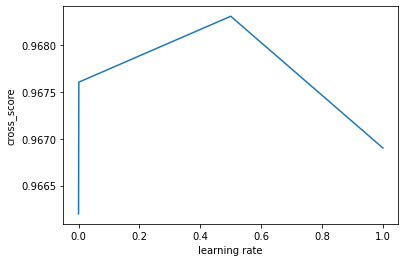

The best learning rate is:  0.5
Running time is:  0:00:49.032000


In [207]:
#ANN for Pair 2
start = datetime.datetime.now()
score5 = []
lr_list = [1,0.5,0.001,1e-5,1e-8]
for i in lr_list:
    clf = MLPClassifier(solver='adam', alpha = i,hidden_layer_sizes = (10,5,2), random_state=1,max_iter = 800)
    cross_score5 = cross_val_score(clf, x_pca_train2,y_train2,cv = 5).mean()
    score5.append(cross_score5)

lr_array = np.array(lr_list)
score5_array = np.array(score5)
plt.plot(lr_array, score5_array)
plt.xlabel('learning rate')
plt.ylabel('cross_score')
plt.show()
max_index5 = score5_array.argmax()
best_lr = lr_list[max_index5]
print('The best learning rate is: ', best_lr)
end = datetime.datetime.now()
print('Running time is: ',end-start)

In [208]:
start = datetime.datetime.now()
ann_clf = MLPClassifier(solver='adam', alpha = best_lr,hidden_layer_sizes = (10,5,2), random_state=1,max_iter = 800)
ann_clf.fit(x_pca_test2,y_test2)
y_predict = ann_clf.predict(x_pca_test2)
print(accuracy_score(y_test2,y_predict))
end = datetime.datetime.now()
print('Running time is: ',end-start)

0.9936708860759493
Running time is:  0:00:00.455363


/Users/zhuoyunchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


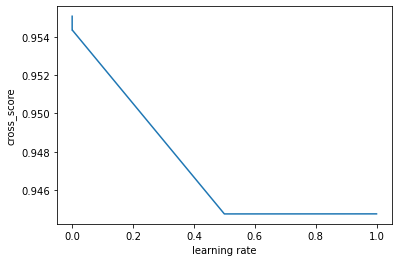

The best learning rate is:  1e-08
Running time is:  0:01:00.789454


In [209]:
#ANN for Pair 3
start = datetime.datetime.now()
score5 = []
lr_list = [1,0.5,0.001,1e-5,1e-8]
for i in lr_list:
    clf = MLPClassifier(solver='adam', alpha = i,hidden_layer_sizes = (10,5,2), random_state=1,max_iter = 800)
    cross_score5 = cross_val_score(clf, x_pca_train3,y_train3,cv = 5).mean()
    score5.append(cross_score5)

lr_array = np.array(lr_list)
score5_array = np.array(score5)
plt.plot(lr_array, score5_array)
plt.xlabel('learning rate')
plt.ylabel('cross_score')
plt.show()
max_index5 = score5_array.argmax()
best_lr = lr_list[max_index5]
print('The best learning rate is: ', best_lr)
end = datetime.datetime.now()
print('Running time is: ',end-start)

In [210]:
start = datetime.datetime.now()
ann_clf = MLPClassifier(solver='adam', alpha = best_lr,hidden_layer_sizes = (10,5,2), random_state=1,max_iter = 800)
ann_clf.fit(x_pca_test3,y_test3)
y_predict = ann_clf.predict(x_pca_test3)
print(accuracy_score(y_test3,y_predict))
end = datetime.datetime.now()
print('Running time is: ',end-start)

0.9933774834437086
Running time is:  0:00:00.612924


/Users/zhuoyunchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
